# Using Self Made CNN 

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
train_P_path = os.path.join('chest_xray/train/PNEUMONIA')
train_P_names = os.listdir(train_P_path)
train_A_path  = os.path.join('chest_xray/train/ATELECTASIS')
train_A_names = os.listdir(train_A_path)
train_N_path = os.path.join('chest_xray/train/NORMAL')
train_N_names = os.listdir(train_N_path)

Now we will visualize some images using matplotlib and mping.

In [5]:
import matplotlib.image as mping
nrows = 4
ncols = 4
image_index = 4

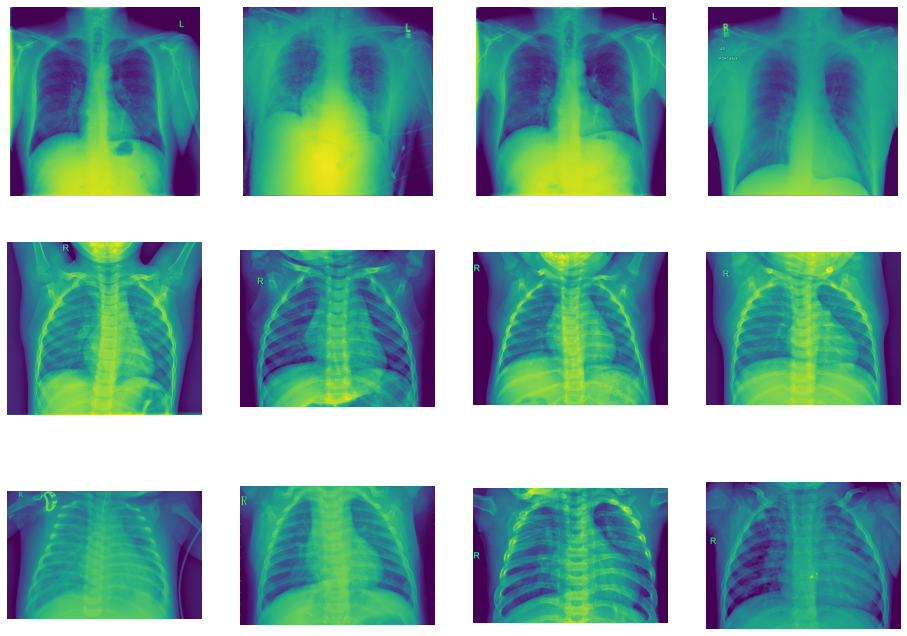

In [6]:
fig = plt.figure()
fig.set_size_inches(nrows*4,ncols*4)

train_A_path = [os.path.join('chest_xray/train/ATELECTASIS', image_name) for image_name
                    in train_A_names[image_index-4:image_index]]

train_N_path = [os.path.join('chest_xray/train/NORMAL', image_name) for image_name
                    in train_N_names[image_index-4:image_index]]

train_P_path = [os.path.join('chest_xray/train/PNEUMONIA',image_name) for image_name
                    in train_P_names[image_index-4:image_index]]
for i, image_path in enumerate(train_A_path+train_N_path+train_P_path):
    s = plt.subplot(nrows,ncols,i+1)
    s.axis('Off')
    
    img = mping.imread(image_path)
    plt.imshow(img)

plt.show()

Creating a model with 6 convolution and pooling layers, and 3 connected neuron layers.

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape = (300,300,3)
                             ,activation = 'relu')
                             ,tf.keras.layers.MaxPooling2D(2,2)
                             ,tf.keras.layers.Conv2D(64,(3,3),activation = 'relu')
                             ,tf.keras.layers.MaxPooling2D(2,2)
                             ,tf.keras.layers.Conv2D(128,(3,3),activation= 'relu')
                             ,tf.keras.layers.MaxPooling2D(2,2)
                             ,tf.keras.layers.Conv2D(256,(3,3),activation= 'relu')
                             ,tf.keras.layers.MaxPooling2D(2,2)
                             ,tf.keras.layers.Conv2D(256,(3,3),activation= 'relu')
                             ,tf.keras.layers.MaxPooling2D(2,2)
                             ,tf.keras.layers.Conv2D(256,(3,3),activation= 'relu')
                             ,tf.keras.layers.Flatten()
                             ,tf.keras.layers.Dense(units = 256,activation = 'relu')
                             ,tf.keras.layers.Dense(units = 3,activation = 'softmax')])

In [8]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 256)       2

In [35]:
#collecting and rescaling the images.
import tensorflow as tf

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_image_gen = ImageDataGenerator(rescale = 1/255.0)


training_generator = train_image_gen.flow_from_directory('chest_xray/train',target_size = (300,300)
                                                     ,batch_size = 32, class_mode = 'categorical')
test_image_gen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_image_gen.flow_from_directory('chest_xray/test',target_size = (300,300)
                                                     ,batch_size = 32, class_mode = 'categorical')


Found 9183 images belonging to 3 classes.
Found 1616 images belonging to 3 classes.


In [38]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs = {}):
        if logs.get('accuracy')>0.97:
            print('\n97% accuracy is reached, training is stopping')
            self.model.stop_training = True

In [39]:
callback = myCallback()

In [40]:
r = model.fit(training_generator, validation_data= test_generator
          , validation_steps = len(test_generator), steps_per_epoch = len(training_generator)
          , epochs = 10, callbacks = [callback])

Epoch 1/10
287/287 [==============================] - 1475s 5s/step - loss: 0.3747 - accuracy: 0.8336 - val_loss: 0.2637 - val_accuracy: 0.8942
Epoch 2/10
287/287 [==============================] - 1418s 5s/step - loss: 0.1214 - accuracy: 0.9593 - val_loss: 0.4144 - val_accuracy: 0.8905
Epoch 3/10
287/287 [==============================] - 1507s 5s/step - loss: 0.0913 - accuracy: 0.9681 - val_loss: 0.2982 - val_accuracy: 0.8973
Epoch 4/10
287/287 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9760
97% accuracy is reached, training is stopping
287/287 [==============================] - 1411s 5s/step - loss: 0.0690 - accuracy: 0.9760 - val_loss: 0.3095 - val_accuracy: 0.8973


Plotting the loss and accuracy for training and test data

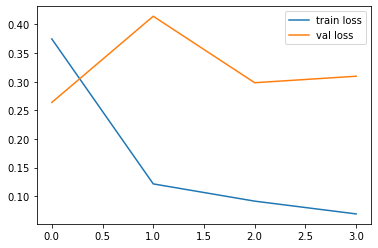

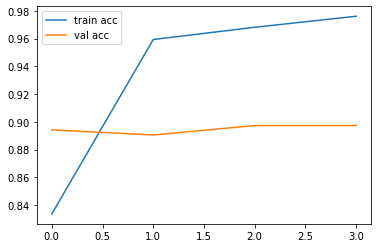

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Saving the model

In [42]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_9layer_3class.h5')

# Transfer Learning Using VGG16 

Fist We will import some important Libraries and import vgg16 from keras api

In [10]:
# import the libraries as shown below
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image      
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential        
import numpy as np                         
from glob import glob
import matplotlib.pyplot as plt

We are setting our target size to be 200x200 px

In [11]:
# re-size all the images to this
IMAGE_SIZE = [200, 200]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
Here we will be using imagenet weights so we do not need to train weight ourselves

In [12]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False                                           

In [14]:
# glob library used to extract folder location through regex like syntax
folders = glob('chest_xray/train/*')

In [15]:
# custom outer layers - you can add more if you want
x = Flatten()(vgg.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

Using the Adam optimizer and categorical_crossentropy as loss function.
Model will be measured on accuracy

In [18]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [19]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9183 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1616 images belonging to 3 classes.


In [22]:
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
287/287 [==============================] - 2693s 9s/step - loss: 0.1630 - accuracy: 0.9395 - val_loss: 0.1015 - val_accuracy: 0.9616
Epoch 2/3
287/287 [==============================] - 2740s 10s/step - loss: 0.0907 - accuracy: 0.9694 - val_loss: 0.1049 - val_accuracy: 0.9635
Epoch 3/3
287/287 [==============================] - 2699s 9s/step - loss: 0.0841 - accuracy: 0.9705 - val_loss: 0.1233 - val_accuracy: 0.9623


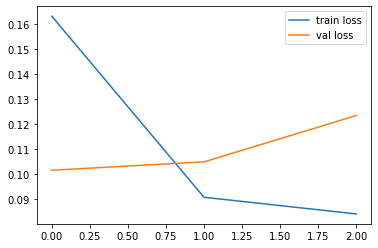

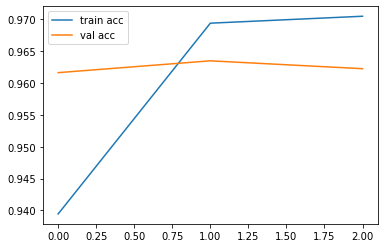

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [24]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16_3class.h5')

# Transfer Learning Using Inception V3

In [25]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

#from keras.applications.vgg19 import VGG19
#Lets work with InceptionV3 and see it's accuracy
from keras.applications.inception_v3 import InceptionV3

In [26]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [27]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

Iv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [28]:
# don't train existing weights
for layer in Iv3.layers:
    layer.trainable = False   

In [29]:
# useful for getting number of output classes
folders = glob('chest_xray/train/*')

In [30]:
# our layers - you can add more if you want
x = Flatten()(Iv3.output)

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=Iv3.input, outputs=prediction)

In [32]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9183 images belonging to 3 classes.


In [36]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1616 images belonging to 3 classes.


In [37]:
# Run the cell. It will take some time to execute
I = model.fit(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
287/287 [==============================] - 1135s 4s/step - loss: 1.0426 - accuracy: 0.9101 - val_loss: 2.1087 - val_accuracy: 0.9028
Epoch 2/3
287/287 [==============================] - 1189s 4s/step - loss: 0.5952 - accuracy: 0.9449 - val_loss: 0.9891 - val_accuracy: 0.9356
Epoch 3/3
287/287 [==============================] - 1026s 4s/step - loss: 0.5486 - accuracy: 0.9527 - val_loss: 0.5928 - val_accuracy: 0.9542


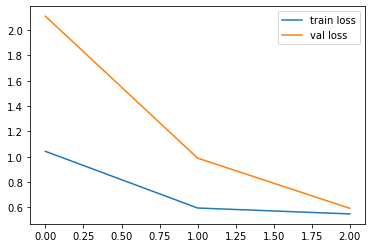

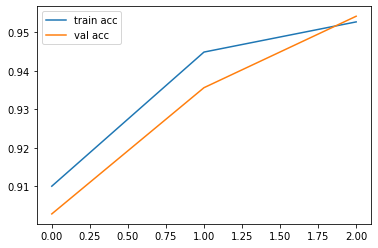

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(I.history['loss'], label='train loss')
plt.plot(I.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(I.history['accuracy'], label='train acc')
plt.plot(I.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [52]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model


model.save('model_inceptionV3_3class.h5')

# Evaluating the model Performance and Predicting the values

In [87]:
def ModelPerformance(image_path = 'chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'):
    print("Enter the 0 for 9layer model, 1 for VGG16 and 2 for Inception V3")
    user_input = input()

    if int(user_input) ==0:
        path = 'model_9layer_3class.h5'
        target_size = (300,300)
    elif int(user_input)==1:
        path = 'model_vgg16_3class.h5'
        target_size = (200,200)
    elif int(user_input)==2:
        path = 'model_inceptionV3_3class.h5'
        target_size = (224,224)
    else:
        return'enter only from 0,1,2'
    from keras.preprocessing import image
    model = load_model(path)
    img = image.load_img(image_path,target_size = target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    img_data = preprocess_input(x)
    classes = model.predict(img_data)
    max_value = max(classes[0])
    max_index = list(classes[0]).index(max_value)
    if max_index ==0:
        print('Predicting Atelectasis')
    if max_index ==1:
        print('Predicting Normal')
    if max_index ==2:
        print('predicting Pneumonia')
    image = mping.imread(image_path)
    plt.imshow(image)
        
        

Enter the 0 for 9layer model, 1 for VGG16 and 2 for Inception V3
2
Predicting Atelectasis


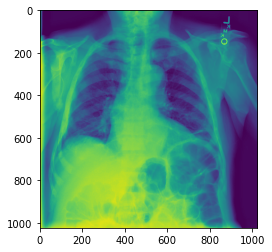

In [100]:
ModelPerformance('chest_xray/val/ATELECTASIS/00000011_006.png')